<a href="https://colab.research.google.com/github/jeongukjae/pytorch-tutorial/blob/master/ch3/3_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST with PyTorch

(CNN)

In [0]:
import torch

from torch import nn, optim
from torch.nn import functional
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset, random_split

from torchvision import datasets, transforms

from sklearn import model_selection

from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline

In [0]:
# load mnist data
mnist_train = datasets.MNIST('./mnist-data',
                       download=True,
                       train=True,
                       transform=transforms.ToTensor())
mnist_test = datasets.MNIST('./mnist-data',
                       download=True,
                       train=False,
                       transform=transforms.ToTensor())

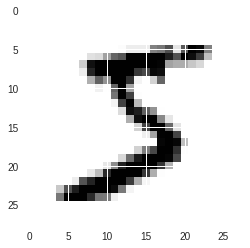

In [3]:
# show mnist data
plt.imshow(mnist_train.data[0], cmap=cm.gray_r)
plt.show()

In [4]:
print(f"total size of mnist training data: {mnist_train.data.shape}")
print(f"total size of mnist testing data: {mnist_test.data.shape}")

packed_train_data = DataLoader(mnist_train, batch_size=100, shuffle=True)

total size of mnist training data: torch.Size([60000, 28, 28])
total size of mnist testing data: torch.Size([10000, 28, 28])


In [0]:
class Neuralnet(nn.Module):
  def __init__(self):
    super(Neuralnet, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, 5)
    self.conv2 = nn.Conv2d(8, 16, 5)
    
    self.fully_connected1 = nn.Linear(256, 128)
    self.fully_connected2 = nn.Linear(128, 10)

  def forward(self, input):
    x = functional.max_pool2d(functional.relu(self.conv1(input)), 2)
    x = functional.max_pool2d(functional.relu(self.conv2(x)), 2)

    x = x.view(-1, 256)
    x = functional.relu(self.fully_connected1(x))
    return functional.log_softmax(self.fully_connected2(x), dim=1)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Neuralnet().to(device)

print(f"is gpu?: {torch.cuda.is_available()}")

is gpu?: True


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(20):
  total_loss = 0
  
  for train_x, train_y in packed_train_data:
    train_x = train_x.to(device)
    train_y = train_y.to(device)
    optimizer.zero_grad()
    
    output = model(train_x)
    
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    
    total_loss += loss.data.item()
  
  print(f"epoch {epoch + 1}, loss: {total_loss}")

epoch 1, loss: 1109.0054901838303
epoch 2, loss: 257.68004980683327
epoch 3, loss: 166.967216424644
epoch 4, loss: 126.98606924712658
epoch 5, loss: 102.12285390868783
epoch 6, loss: 86.55035280063748
epoch 7, loss: 75.99609312601388
epoch 8, loss: 67.25557247921824
epoch 9, loss: 61.35300855245441
epoch 10, loss: 56.364834351465106
epoch 11, loss: 52.395206150598824
epoch 12, loss: 48.87818210572004
epoch 13, loss: 46.5550894215703
epoch 14, loss: 43.739330866374075
epoch 15, loss: 41.40606602653861
epoch 16, loss: 39.844686426222324
epoch 17, loss: 38.40215003956109
epoch 18, loss: 36.51372392196208
epoch 19, loss: 35.15082766767591
epoch 20, loss: 33.96119598066434


In [0]:
x = mnist_test.data
y = mnist_test.targets

x = x.to(device)

result = torch.max(model(torch.reshape(x, (10000, 1, 28, 28)).float()), 1)[1]
accuracy = sum(y.data.numpy() == result.detach().cpu().numpy()) / len(y.data.numpy())

In [23]:
print(f"accuracy: {accuracy}")

accuracy: 0.9833
